In [1]:
import tensorflow

import data

In [2]:
from tensorflow.python.keras.datasets import imdb

load data

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000) # only most common 10000 words from the bag of words will be used and rest will be ignored

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [ ]:
y_train[0]

1

In [4]:
class_names = ['positive', 'negative']

word_index is a dictionary that has words as keys and the unique tokens assigned to them as values

In [5]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index['flop']

4057

decoding reviews

for decoding reviews (for your own reference), create a reverse dictionary where tokens are keys and the words to which they are assigned to are values

In [28]:
reverse_word_index = dict((key, value) for value,key in word_index.items())

In [29]:
def decoding_reviews(review):
  text = ' '
  for token in review:
    text = text + reverse_word_index[token]
    text = text + ' '

  return text

In [9]:
decoding_reviews(x_train[3])

" the of and and they halfway of identity went plot actors watch of share was well these can this only and ten so failing feels only novak killer theo of bill br and would find of films saw grade about hated it for br so ten remain by in of songs are of and gigantic is morality it's her or know would care i i br screen that obvious plot actors new would with paris not have attempt lead or of too would local that of every their it coming this eleven of information to and br singers movie was anxious that film is under by left this and is entertainment ok this in own be house of sticks worker in bound my i i obviously sake things just as lost lot br comes never like thing start of obviously comes indeed coming want no bad than history from lost comes accidentally young to movie bad facts dream from reason these honor movie elizabeth it's movie so fi and enough to computer duo film and almost jeffrey rarely obviously and alive to appears i i only human it and just only hop to be hop new m

In [10]:
print(len(x_train[3]))

550


In [11]:
print(x_train[3])

[1, 4, 2, 2, 33, 2804, 4, 2040, 432, 111, 153, 103, 4, 1494, 13, 70, 131, 67, 11, 61, 2, 744, 35, 3715, 761, 61, 5766, 452, 9214, 4, 985, 7, 2, 59, 166, 4, 105, 216, 1239, 41, 1797, 9, 15, 7, 35, 744, 2413, 31, 8, 4, 687, 23, 4, 2, 7339, 6, 3693, 42, 38, 39, 121, 59, 456, 10, 10, 7, 265, 12, 575, 111, 153, 159, 59, 16, 1447, 21, 25, 586, 482, 39, 4, 96, 59, 716, 12, 4, 172, 65, 9, 579, 11, 6004, 4, 1615, 5, 2, 7, 5168, 17, 13, 7064, 12, 19, 6, 464, 31, 314, 11, 2, 6, 719, 605, 11, 8, 202, 27, 310, 4, 3772, 3501, 8, 2722, 58, 10, 10, 537, 2116, 180, 40, 14, 413, 173, 7, 263, 112, 37, 152, 377, 4, 537, 263, 846, 579, 178, 54, 75, 71, 476, 36, 413, 263, 2504, 182, 5, 17, 75, 2306, 922, 36, 279, 131, 2895, 17, 2867, 42, 17, 35, 921, 2, 192, 5, 1219, 3890, 19, 2, 217, 4122, 1710, 537, 2, 1236, 5, 736, 10, 10, 61, 403, 9, 2, 40, 61, 4494, 5, 27, 4494, 159, 90, 263, 2311, 4319, 309, 8, 178, 5, 82, 4319, 4, 65, 15, 9225, 145, 143, 5122, 12, 7039, 537, 746, 537, 537, 15, 7979, 4, 2, 594, 7, 516

padding reviews

In [6]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(sequences = x_train, value = word_index['a'], padding = 'post', maxlen = 256)
x_test = pad_sequences(sequences = x_test, value = word_index['a'], padding = 'post', maxlen = 256)


In [13]:
x_train[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [14]:
x_test[1]

array([   6,  176,    7, 5063,   88,   12, 2679,   23, 1310,    5,  109,
        943,    4,  114,    9,   55,  606,    5,  111,    7,    4,  139,
        193,  273,   23,    4,  172,  270,   11, 7216,    2,    4, 8463,
       2801,  109, 1603,   21,    4,   22, 3861,    8,    6, 1193, 1330,
         10,   10,    4,  105,  987,   35,  841,    2,   19,  861, 1074,
          5, 1987,    2,   45,   55,  221,   15,  670, 5304,  526,   14,
       1069,    4,  405,    5, 2438,    7,   27,   85,  108,  131,    4,
       5045, 5304, 3884,  405,    9, 3523,  133,    5,   50,   13,  104,
         51,   66,  166,   14,   22,  157,    9,    4,  530,  239,   34,
       8463, 2801,   45,  407,   31,    7,   41, 3778,  105,   21,   59,
        299,   12,   38,  950,    5, 4521,   15,   45,  629,  488, 2733,
        127,    6,   52,  292,   17,    4, 6936,  185,  132, 1988, 5304,
       1799,  488, 2693,   47,    6,  392,  173,    4,    2, 4378,  270,
       2352,    4, 1500,    7,    4,   65,   55,   

In [15]:
len(x_train[0])

256

In [16]:
len(x_test[1])

256

In [17]:
decoding_reviews(x_train[2])

" the as there in at by br of sure many br of proving no only women was than doesn't as you never of hat night that with ignored they bad out superman plays of how star so stories film comes defense date of wide they don't do that had with of hollywood br of my seeing fan this of pop out body shots in having because cause it's stick passing first were enjoys for from look seven sense from me and die in character as cuban issues but is you that isn't one song just is him less are strongly not are you that different just even by this of you there is eight when it part are film's love film's 80's was big also light don't and as it in character looked cinematography so stories is far br man acting a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a a "

In [18]:
y_train[2]

0

creating and training the model

In [7]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Dense, GlobalAveragePooling1D

In [12]:
model = Sequential(layers=[
                           Embedding(10000, 16),              # input layer for embedding 10000 words into 16 features
                           GlobalAveragePooling1D(),          # pooling layer which will convert our feature representations of 10,000 by 16 (2-dimensional input) to a 16 dimension vector (1-dimensional form) for each batch of x_train
                           Dense(16, activation= 'relu'),
                           Dense(1, activation= 'sigmoid')    # dense layer with an appropriate activation function to give us a binary classification output for the two classes that we have
])


model.compile(
    

    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)



In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [10]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log = LambdaCallback(on_epoch_end = lambda e, l: print(e, end = '.'))

E = 20

h = model.fit(
    x_train, y_train,
    validation_split = 0.2,
    epochs = E,
    callbacks = [simple_log],
    verbose = False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

prediction and evaluation

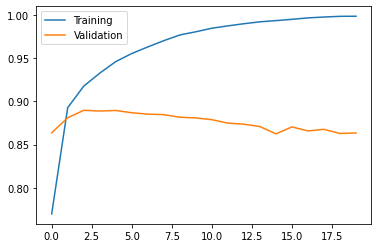

In [19]:
#plotting accuracies for training and test sets

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E), h.history['accuracy'], label = 'Training')

plt.plot(range(E), h.history['val_accuracy'], label = 'Validation')

plt.legend()

plt.show()

In [20]:
loss, acc = model.evaluate(x_test, y_test)

print('Test accuracy :', acc*100)

782/782 [==============================] - 1s 1ms/step - loss: 0.6930 - accuracy: 0.5005
Test accuracy : 50.05199909210205


the model is clearly overfitting

predicting a new value

In [22]:
import numpy as np

prediction = model.predict(np.expand_dims(x_test[1], axis = 0))

print(class_names[int(prediction[0]>0.5)])

negative


In [30]:
print(decoding_reviews(x_test[1]))

 is quite br mankind most that quest are chase to being quickly of little it time hell to plot br of something long put are of every place this consequence and of interplay storytelling being nasty not of you warren in is failed club i i of films pay so sequences and film okay uses to received and if time done for room sugar viewer as cartoon of gives to forgettable br be because many these of reflection sugar contained gives it wreck scene to more was two when had find as you another it of themselves probably who interplay storytelling if itself by br about 1950's films not would effects that her box to miike for if hero close seek end is very together movie of wheel got say kong sugar fred close bore there is playing lot of and pan place trilogy of lacks br of their time much this men as on it is telling program br silliness okay and to frustration at corner and she of sequences to political clearly in of drugs keep guy i i was throwing room sugar as it by br be plot many for occasio